## Skills Pay Analysis

In [1]:
# Importing Libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import ast

# Loading Data 
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\PC-USER\anaconda3\envs\wcourse\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Filtering for data scientist jobs in the UK only
df_uk = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United Kingdom')].copy()

# Dropping NaN values in the salary year avg column for accurate visualization
df_uk = df_uk.dropna(subset=['salary_year_avg'])

In [6]:
# Exploding our job_skills column
df_uk = df_uk.explode('job_skills')

df_uk[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
1107,157500.0,python
1107,157500.0,numpy
1107,157500.0,pandas
1107,157500.0,scikit-learn
13764,109500.0,excel
...,...,...
783436,72900.0,keras
783436,72900.0,tensorflow
783436,72900.0,tableau
783436,72900.0,flow


In [26]:
# Creating a df containing the job_skills with their count and median salary
df_uk_group = df_uk.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

# Sorting now
skills_count = df_uk_group.sort_values(by='count', ascending=False).head(6).sort_values(by='median', ascending=False)

avg_sal = df_uk_group.sort_values(by='median', ascending=False).head(6)

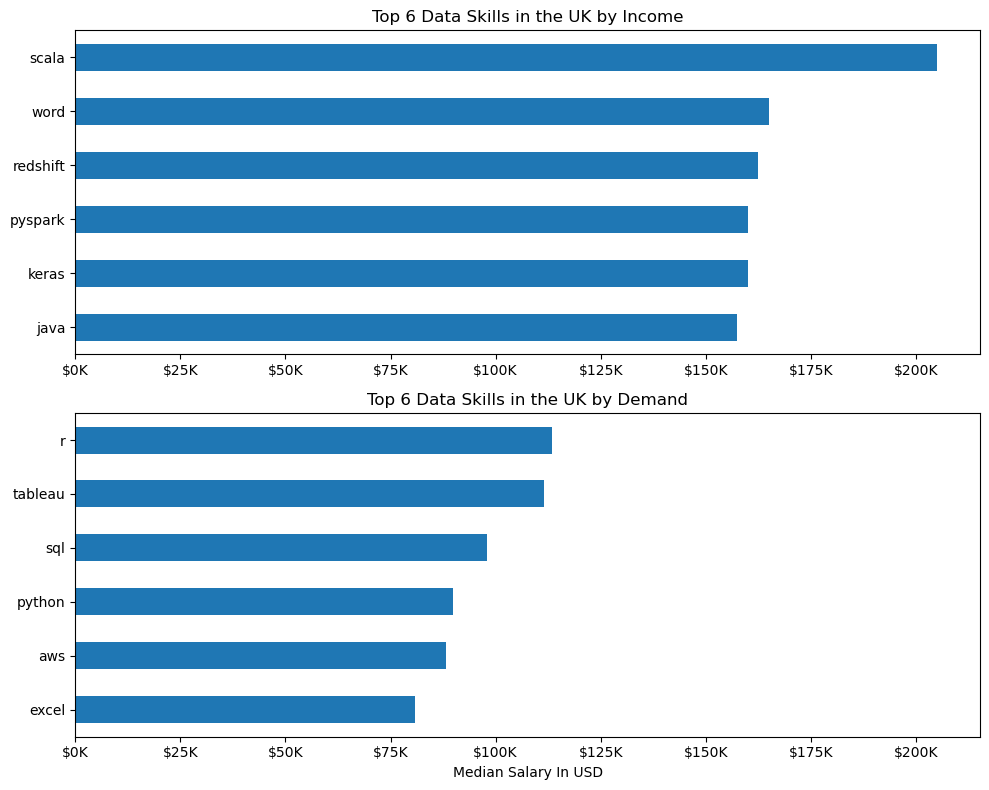

In [33]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))


avg_sal[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 6 Data Skills in the UK by Income')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

skills_count[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 6 Data Skills in the UK by Demand')
ax[1].set_xlabel('Median Salary In USD')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())


fig.tight_layout()
